# Cellector: a tool for cell counting

#### by: Mac Englund + Alexia Williams

ideas for things to add?: 

- parameters based on shape (i.e. defining the shape of a circle and only selecting objects that match that shape, then making a new image)
- parameters based on size (i.e. defining how large an object must be, only selecting objects matching that size, make a new image?)

In [1]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from skimage import io
from skimage import feature
from skimage import filters
from skimage import data

from skimage import measure
import cv2 as cv
import cv2 as cv2
import imageio

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import img_as_float
from skimage import exposure

In [6]:
class cellector:
    def __init__(self,image):
        self.image = image
        plt.imshow(image)
        plt.show()

    def separate_color(self):
        f, axarr = plt.subplots(1,4,figsize=(15,5) )
        for i in range(4):
            axarr[i].imshow(image[:,:,i], cmap='gray')
        #This function separates out the image colors.. I just used this as a quick example to test out how classes work

    def morph_count(self):        
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        fig = plt.figure(1, figsize=(10,3))
        plt.imshow(gray, cmap='gray', interpolation = 'bicubic')
        plt.show()

        ret, bin_im = cv.threshold(gray,20,255,cv.THRESH_BINARY)

        fig = plt.figure(2,figsize=(10,3))
        plt.imshow(bin_im, cmap='gray', interpolation = 'bicubic')

        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))

        im_erode = cv.erode(bin_im, struct)
        fig = plt.figure(3,figsize=(10,3))
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')
        plt.show()

        im_dilate = cv.dilate(im_erode, struct)
        fig = plt.figure(4,figsize=(10,3))
        plt.imshow(im_dilate, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
                  
        labels = measure.label(im_dilate)
        print(labels.max())
        
        # this code takes in an image and converts it to grayscale, defines a threshold based on color, selects objects within 
        # that range, rids of anything not in that range, and then reports back the number of remaining objects.

        
    def smallcell(self):
        gray1_file = 'PVNdrawcolor.png'                   #loads in new image with user drawing on it 
        gray1 = sk.io.imread(gray1_file)                  #reads in image  
        
        
        
        blue = gray1[:,:,2]                               #selects the blue channel 
        
        ret, bin_im = cv.threshold(blue,200,255,cv.THRESH_BINARY)  #selects/filters to just the blue circle and prints the image
        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
        im_erode = cv.erode(bin_im, struct)
        fig = plt.figure(3,figsize=(20,6))
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')     
        plt.show()                                         
        #ok now that we have an image with just the selected circle, we need to measure it 
        
        
        # need to find the circle we drew in this image, so we will use contours 
        # http://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py
        ret,thresh = cv.threshold(im_erode,127,255,0)
        im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
        cnt = contours[0]
        M = cv.moments(cnt)
    
        # metrics of circle you drew 
        area = cv.contourArea(cnt)
        perimeter = cv.arcLength(cnt,True)
        min_radius = perimeter / (2*3.14159)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print('area of your circle:',area)  
        print('perimeter of your circle:',perimeter)
        print('radius of your circle',min_radius)
        print('location of your circle:',cx,cy) #prints coordinates for verification it was their circle they drew
        
        
        #This function then returns the variable min_radius as a parameter which can be used in future functions as requirement        
        

 ### various cell counting based on histogram equalization techniques        
    def hist_equalize(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)   
        img_eq = exposure.equalize_hist(gray) 
        plt.imshow(img_eq, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_eq)
        print(labels.max())
        
    def contrast_stretch(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        p2, p98 = np.percentile(gray, (2, 98))
        img_rescale = exposure.rescale_intensity(gray, in_range=(p2, p98)) 
        plt.imshow(img_rescale, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_rescale)
        print(labels.max())  
        
     
    def adapt_equalization(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        img_adapteq = exposure.equalize_adapthist(gray, clip_limit=0.03)
        plt.imshow(img_adapteq, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_adapteq)
        print(labels.max())            

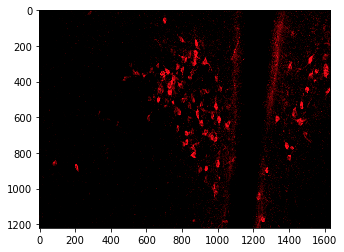

In [7]:
# loading in image for processing 

image = sk.io.imread('https://raw.githubusercontent.com/alexiawilliams/pythonfinalproject/master/PVN.png')

# we can pass our image through our class, which then prints the image when it initializes
pvncounts = cellector(image)

#Then that image is then stored within the variable pvncounts 
#and this allows us to use that same image, but access different functions we made in the class
#so we can call the function separate_color, which we defined in our cellector class

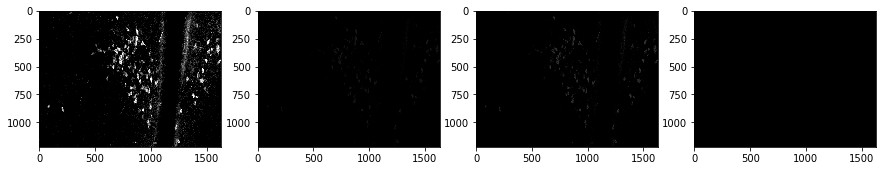

In [4]:
# calling various functions from cellector to see if they work properly/how they do

pvncounts.separate_color()

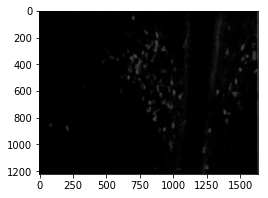

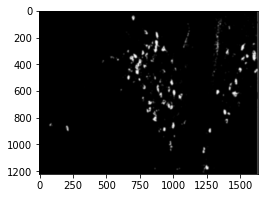

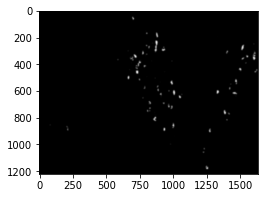

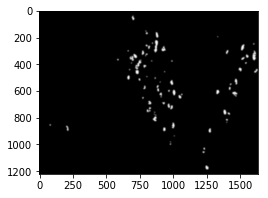

83


In [8]:
pvncounts.morph_count()

In [7]:
pvncounts.smallcell()

FileNotFoundError: [Errno 2] No such file or directory: 'PVNdrawcolor.png'

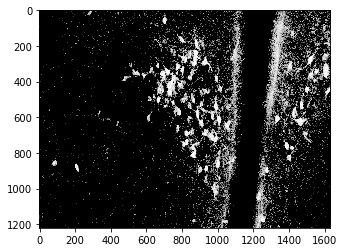

19


In [9]:
pvncounts.hist_equalize()

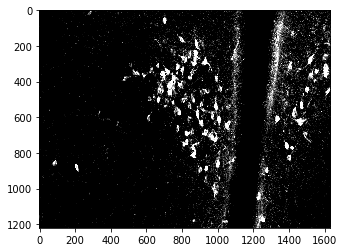

169599


In [10]:
pvncounts.contrast_stretch()

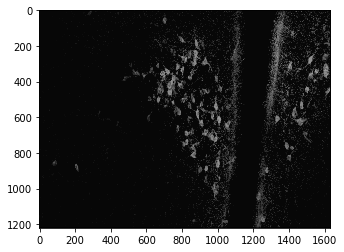

19


In [11]:
pvncounts.adapt_equalization()